# 1 Theory

## 1.1 Quantum Chemistry
The physical properties of systems investigated in quantum chemistry (e.g. electrolyte-surface interfaces) are derived from the many body state $|\psi \rangle$, which solves the stationary Schrödinger equation

$$ \hat{H}|\psi \rangle=E |\psi \rangle. $$
In the following, the occupation number representation will be used, i.e.

$$ |\psi \rangle \rightarrow |n_1,n_2,...,n_N \rangle, $$
with fermionic occupation numbers $n_i =0,1$ of orbital $i$.

## 1.2 Differentiable Hartree-Fock
The molecular Hamilton operator in second quantization can be derived as

$$ \hat{H} = \sum_{p,q}h_{p,q}\,a_p\,a^{\dagger}_q \, +\, \frac{1}{2}\sum_{p,q,r,s}h_{p,q,r,s}\,a^{\dagger}_p\,a^{\dagger}_q a_r \,a_s\,, $$


# 2 Implementation
The simulations will be done with **PennyLane** and Python3.9. The code is taken from
[[1]](#another_cell) and [[2]](#another_cell).<br> 
k

In [2]:
from autograd import grad
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=5)

symbols = ["H", "H"]
# optimized geometry at the Hartree-Fock level
geometry = np.array([[-0.672943567415407, 0.0, 0.0],
                     [ 0.672943567415407, 0.0, 0.0]], requires_grad=True)
mol = qml.qchem.Molecule(symbols, geometry)
a = qml.qchem.hf_energy(mol)(geometry)
print(a)

[-1.11751]


With these predefined methods, we can compute e.g. the bonding length of the H$_2$ molecule by minimizing the total energy:

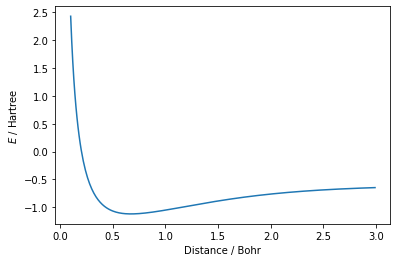

Bonding length = 1.34 Bohr


In [15]:
x=[]
y=[]

for i in range(10,300):
    b = i/100
    geometry = np.array([[b, 0.0, 0.0],
                         [ -1*b, 0.0, 0.0]], requires_grad=True)

    mol = qml.qchem.Molecule(symbols, geometry)
    energy=qml.qchem.hf_energy(mol)(geometry)
    x.append(b)
    y.append(energy)
    
plt.plot(x,y)
plt.ylabel("$E$ / Hartree")
plt.xlabel("Distance / Bohr")
plt.show()
min=np.argmin(y)
print("Bonding length =",2*x[min],"Bohr") # approximate bonding length of H_2 in Bohr

Which achieves $\approx$ 4% deviation from numerical results using DFT (ref. [[3]](#another_cell)).


<a id='another_cell'></a> 
# References 
[1] *Differentiable quantum computational chemistry with
PennyLane*, Juan Miguel Arrazola et al., https://arxiv.org/abs/2111.09967
<br>
    [2] *Differentiable Hartree-Fock*, Website, Soran Jahangiri, https://pennylane.ai/qml/demos/tutorial_differentiable_HF.html <br>
                                                                                                                                    [3] *Describing static correlation in bond dissociation by Kohn–Sham density functional theory*, Martin Fuchs et al, The Journal of chemical physics 122, page 94116